In [27]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [28]:
print(train_data.shape)
print(train_labels.shape)

(25000,)
(25000,)


In [29]:
# deocde alien review
word_index = imdb.get_word_index()
def deocde_review(review):
    reverse = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    decoded = ' '.join([reverse.get(key, '?') for key in review])
    return decoded

In [30]:
print(deocde_review(train_data[0]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [31]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [34]:
max([max(sequence) for sequence in train_data])

9999

In [35]:
train_x = vectorize_sequences(train_data)
test_x = vectorize_sequences(test_data)

In [36]:
print(train_x.shape)

(25000, 10000)


In [45]:
train_y = np.asarray(train_labels).astype('float32')
test_y = np.asarray(test_labels).astype('float32')

In [40]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [41]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
x_val = train_x[:10000]
x_trian = train_x[10000:]
y_val = train_y[:10000]
y_train = train_y[10000:]

In [47]:
history = network.fit(x_trian, y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 111ms/step - loss: 0.5929 - accuracy: 0.7101 - val_loss: 0.4001 - val_accuracy: 0.8701
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3427 - accuracy: 0.8946 - val_loss: 0.3329 - val_accuracy: 0.8678
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2378 - accuracy: 0.9268 - val_loss: 0.2822 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1834 - accuracy: 0.9460 - val_loss: 0.2749 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1493 - accuracy: 0.9549 - val_loss: 0.2758 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1182 - accuracy: 0.9671 - val_loss: 0.2959 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1025 - accuracy: 0.9710 - val_loss: 0.3075 - val_accuracy: 0.8849
Epoch 8/20
3

In [49]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


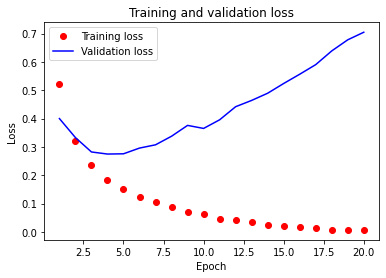

In [53]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'ro', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

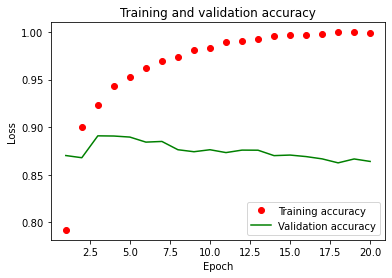

In [59]:
plt.clf()

train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, train_acc, 'ro', label="Training accuracy")
plt.plot(epochs, val_acc, 'g', label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [62]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
model.fit(train_x, train_y, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.5567 - accuracy: 0.7514
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2817 - accuracy: 0.9081
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2070 - accuracy: 0.9287
Epoch 4/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1642 - accuracy: 0.9451


In [64]:
results = model.evaluate(test_x, test_y)

782/782 [==============================] - 3s 3ms/step - loss: 0.2997 - accuracy: 0.8804


In [90]:
review = "I know I'm not the only one who was waiting to see this movie. I loved Wonder Woman and was blown away by its brilliant execution, and that was enough to make me anticipate the sequel with bated breath. And now that I've finally watched it, I feel thrilled! 2 and a half hours just went by like that without even realizing. That's what a big blockbuster is meant to do: make us forget all our worries, sit back and enjoy the ride. The film has two great action sequences in the beginning, following which it slows down to develop the conflict which only results in more action and intensity. Needless to say, Gal Gadot shines as Wonder Woman once again. Chris Pine and Kristen Wiig are stunning, but the most impressive performance comes from Pedro Pascal, who just kills it with his first-rate expressions and dialogue delivery. While the first one was an origin story, this actually feels like a much lighter yet brilliant follow-up; something common with sequels to most popular action movies.Speaking of which, the action sequences are superb! Whether it's the opening stunt sequence or the central set piece or the epic final battle, Wonder Woman 1984 keeps the action coming without eschewing plot development and character richness. The concept is pretty simple and easy to follow, which only makes it easier to get immersed into the narrative. The ending score resonated so much that I couldn't skip the end credits.This film is for the fun loving viewer, reminding how important fun and escapism is, especially when in reality the times are so harsh. I can't speak for others, but I personally enjoyed this film. It was really fun to see a well-made blockbuster action film as the harsh year comes to an end. Go ahead, enjoy this piece."

def encode(review_str):
    encoded = []
    for word in review.split(' '):
        d = word_index.get(word, 0)
        if d >= 10000:
            d = 0
        encoded.append(d)
    return encoded

In [91]:
print(encode(review))

[0, 121, 0, 21, 1, 61, 28, 34, 13, 1061, 5, 64, 11, 0, 0, 444, 0, 0, 2, 13, 2651, 242, 31, 91, 527, 0, 2, 12, 13, 192, 5, 94, 69, 0, 1, 752, 16, 0, 0, 0, 147, 12, 0, 414, 293, 0, 0, 232, 0, 238, 2, 3, 317, 631, 40, 432, 31, 37, 12, 206, 57, 0, 0, 48, 3, 191, 2642, 6, 978, 5, 0, 94, 175, 856, 29, 260, 0, 867, 142, 2, 355, 1, 0, 0, 19, 44, 104, 84, 203, 841, 8, 1, 0, 1042, 60, 9, 9278, 177, 5, 2058, 1, 1941, 60, 61, 1898, 8, 50, 203, 2, 0, 0, 5, 0, 0, 0, 3141, 14, 0, 0, 277, 0, 0, 0, 2, 0, 0, 23, 0, 18, 1, 88, 1156, 236, 263, 36, 0, 0, 34, 40, 1095, 9, 16, 24, 0, 3043, 2, 411, 0, 0, 1, 83, 28, 13, 32, 6171, 0, 11, 162, 761, 37, 3, 73, 6379, 243, 527, 0, 139, 1138, 16, 2286, 5, 88, 1060, 203, 0, 4, 0, 1, 203, 841, 23, 0, 0, 42, 1, 633, 3407, 717, 39, 1, 1372, 267, 415, 39, 1, 1708, 474, 0, 0, 0, 4904, 938, 1, 203, 579, 206, 0, 111, 940, 2, 106, 0, 0, 1117, 6, 181, 603, 2, 773, 5, 0, 60, 61, 163, 9, 3422, 5, 76, 9529, 80, 1, 0, 0, 274, 600, 0, 35, 73, 12, 0, 423, 1768, 1, 127, 0, 19, 6, 15

In [92]:
pred_x = vectorize_sequences(np.array([encode(review)]))
print(pred_x.shape)

(1, 10000)


In [93]:
y = model.predict(test_x)
print(y.shape)

(25000, 1)


In [94]:
pred_y = model.predict(pred_x)
print(pred_y.shape)
print(pred_y)

(1, 1)
[[0.7786771]]


In [111]:
# future learning
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [112]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [113]:
model.fit(train_x, train_y, batch_size=512, epochs=20,)

Epoch 1/20
49/49 [==============================] - 4s 63ms/step - loss: 0.1728 - accuracy: 0.7558
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.0777 - accuracy: 0.9111
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0543 - accuracy: 0.9389
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0435 - accuracy: 0.9493
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0353 - accuracy: 0.9614
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0304 - accuracy: 0.9659
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.0252 - accuracy: 0.9735
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0217 - accuracy: 0.9773
Epoch 9/20
49/49 [==============================] - 1s 23ms/step - loss: 0.0169 - accuracy: 0.9835
Epoch 10/20
49/49 [==============================] - 1s 30ms/step - loss: 0.0167 - accuracy: 0.9836
Epoch 11/

In [114]:
model.evaluate(test_x, test_y)

782/782 [==============================] - 5s 5ms/step - loss: 0.1223 - accuracy: 0.8583


[0.12226327508687973, 0.8583199977874756]